In [1]:
#!/usr/bin/env python
import sys
import os
import pickle as pkl
import warnings
import time
import glob

from functools import wraps, partial
from pathlib import Path
from multiprocessing import cpu_count
from multiprocessing.pool import Pool as Pool

import numpy as np
import matplotlib.pyplot as plt


from AnalyseCID import AnalyseCID
from utils import *
from utils_plot import *

sys.path.append('ComputableInformationDensity_dev')
from ComputableInformationDensity_dev.cid import interlaced_time, cid2d
from ComputableInformationDensity_dev.computable_information_density import cid, cid_shuffle
from ComputableInformationDensity_dev.hilbert_curve import hilbert_curve, itter_hscan

# Get absolute path to this notebook
notebook_path = Path().resolve()
parent_dir = notebook_path.parent
sys.path.append(str(parent_dir))
from NematicAnalysis.utils import gen_clustering_metadata, get_defect_arr_from_frame, calc_weighted_mean

plt.style.use('sg_article')
#plt.rcParams.update({"figure.figsize": (9,6)})
plt.rcParams.update({"text.usetex": True,})
plt.rcParams['legend.handlelength'] = 0


In [100]:
base_path = f'Z:\\cid\\na'
save_path = f'data\\nematic\\na'

extract = False
analyze = False
save_figs = True
verbose = True

data_suffix = ''  # 'sd', 'ndg' or ''    
use_seq = True

nbits = 3
cg = 4

data_dict = {}
sd_data_dict = {'data_suffix': 'sd',
    'output_suffix': f'_seq_nb{nbits}cg{cg}' if use_seq else f'_nb{nbits}cg{cg}',
    'uncertainty_multiplier': 20,
    'L_list': [512],
    'Nexp_list': [10],
    'act_exclude_dict': {512: []}}
na_data_dict = {
    'data_suffix': '',
    'output_suffix': f'_nb{nbits}cg{cg}',
    'uncertainty_multiplier': 20,
    'L_list': [512, 1024, 2048],
    'Nexp_list': [5]*3,
    'act_exclude_dict': {512: [0.02, 0.0225], 1024: [], 2048: [0.0225]}}
ndg_data_dict = {
    'data_suffix': 'ndg',
    'output_suffix': f'_nb{nbits}cg{cg}',
    'uncertainty_multiplier': 20,
    'L_list': [1024],
    'Nexp_list': [1],
    'act_exclude_dict': {1024: []}}
data_dict = {'sd': sd_data_dict, 'ndg': ndg_data_dict, '': na_data_dict}

cid_dict = {
    'base_path': base_path,
    'save_path': save_path,
    'nbits': nbits,
    'cg': cg,
    'verbose': verbose,
    'ddof': 1,
    **data_dict[data_suffix]
}
output_suffix = data_dict[data_suffix]['output_suffix']
fig_folder = 'na' if data_suffix == '' else data_suffix
figs_save_path = f'data\\nematic\\figs\\{fig_folder}\\{output_suffix[1:]}'
if not os.path.exists(figs_save_path): 
    os.makedirs(figs_save_path)


ac = AnalyseCID(cid_dict, load_data=True)

# Set figure save path
ac.figs_save_path = figs_save_path

if extract:
    ac.run()
if analyze and not extract:
    ac.analyze()


Figure saved to: data\nematic\figs\ndg\nb5cg4\cid_dcid.pdf
Figure saved to: data\nematic\figs\ndg\nb5cg4\div_ddiv.pdf


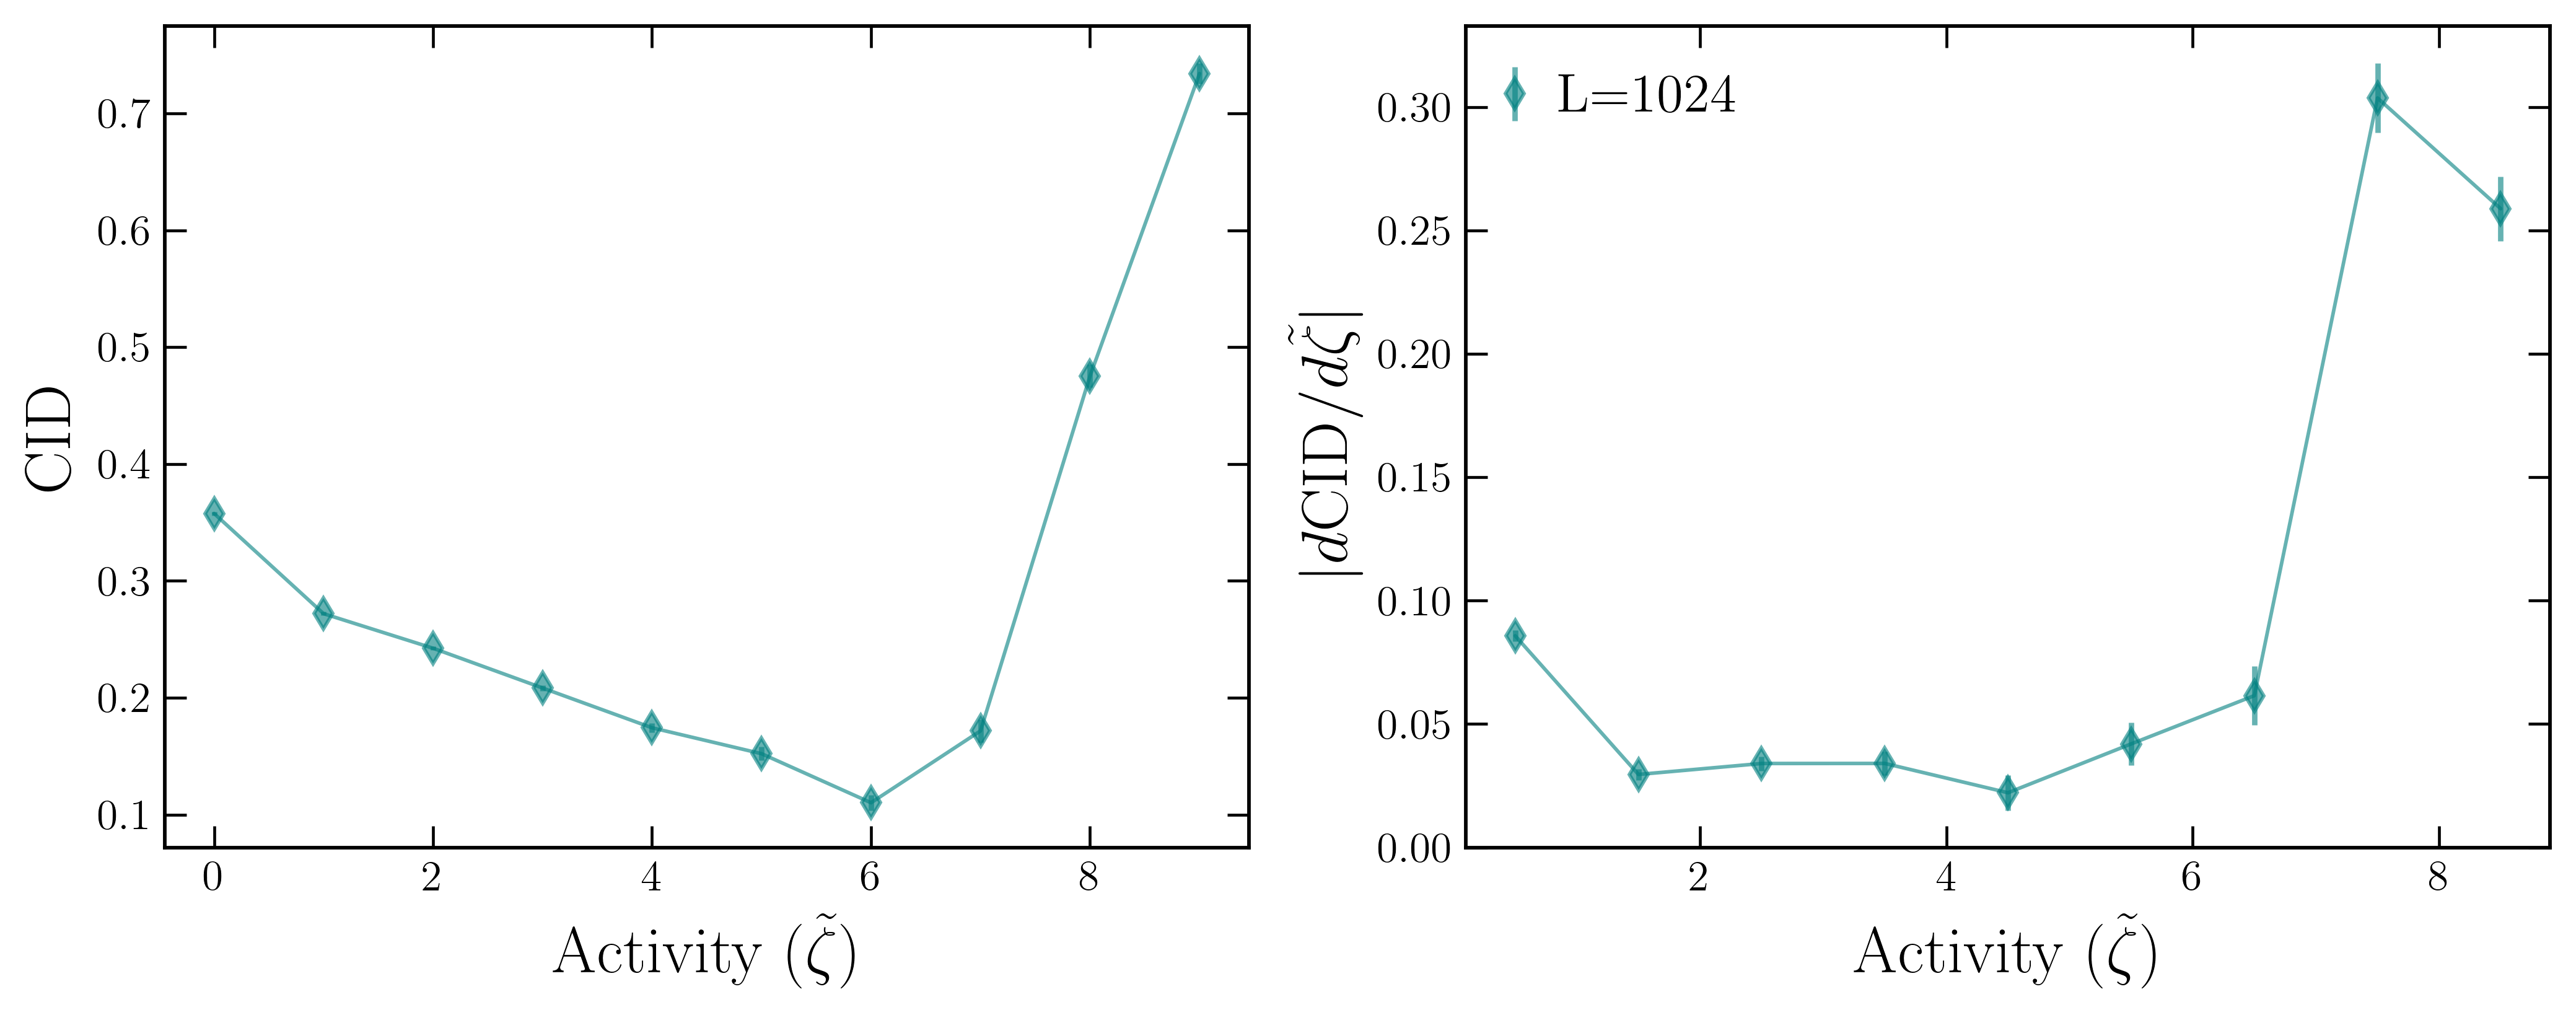

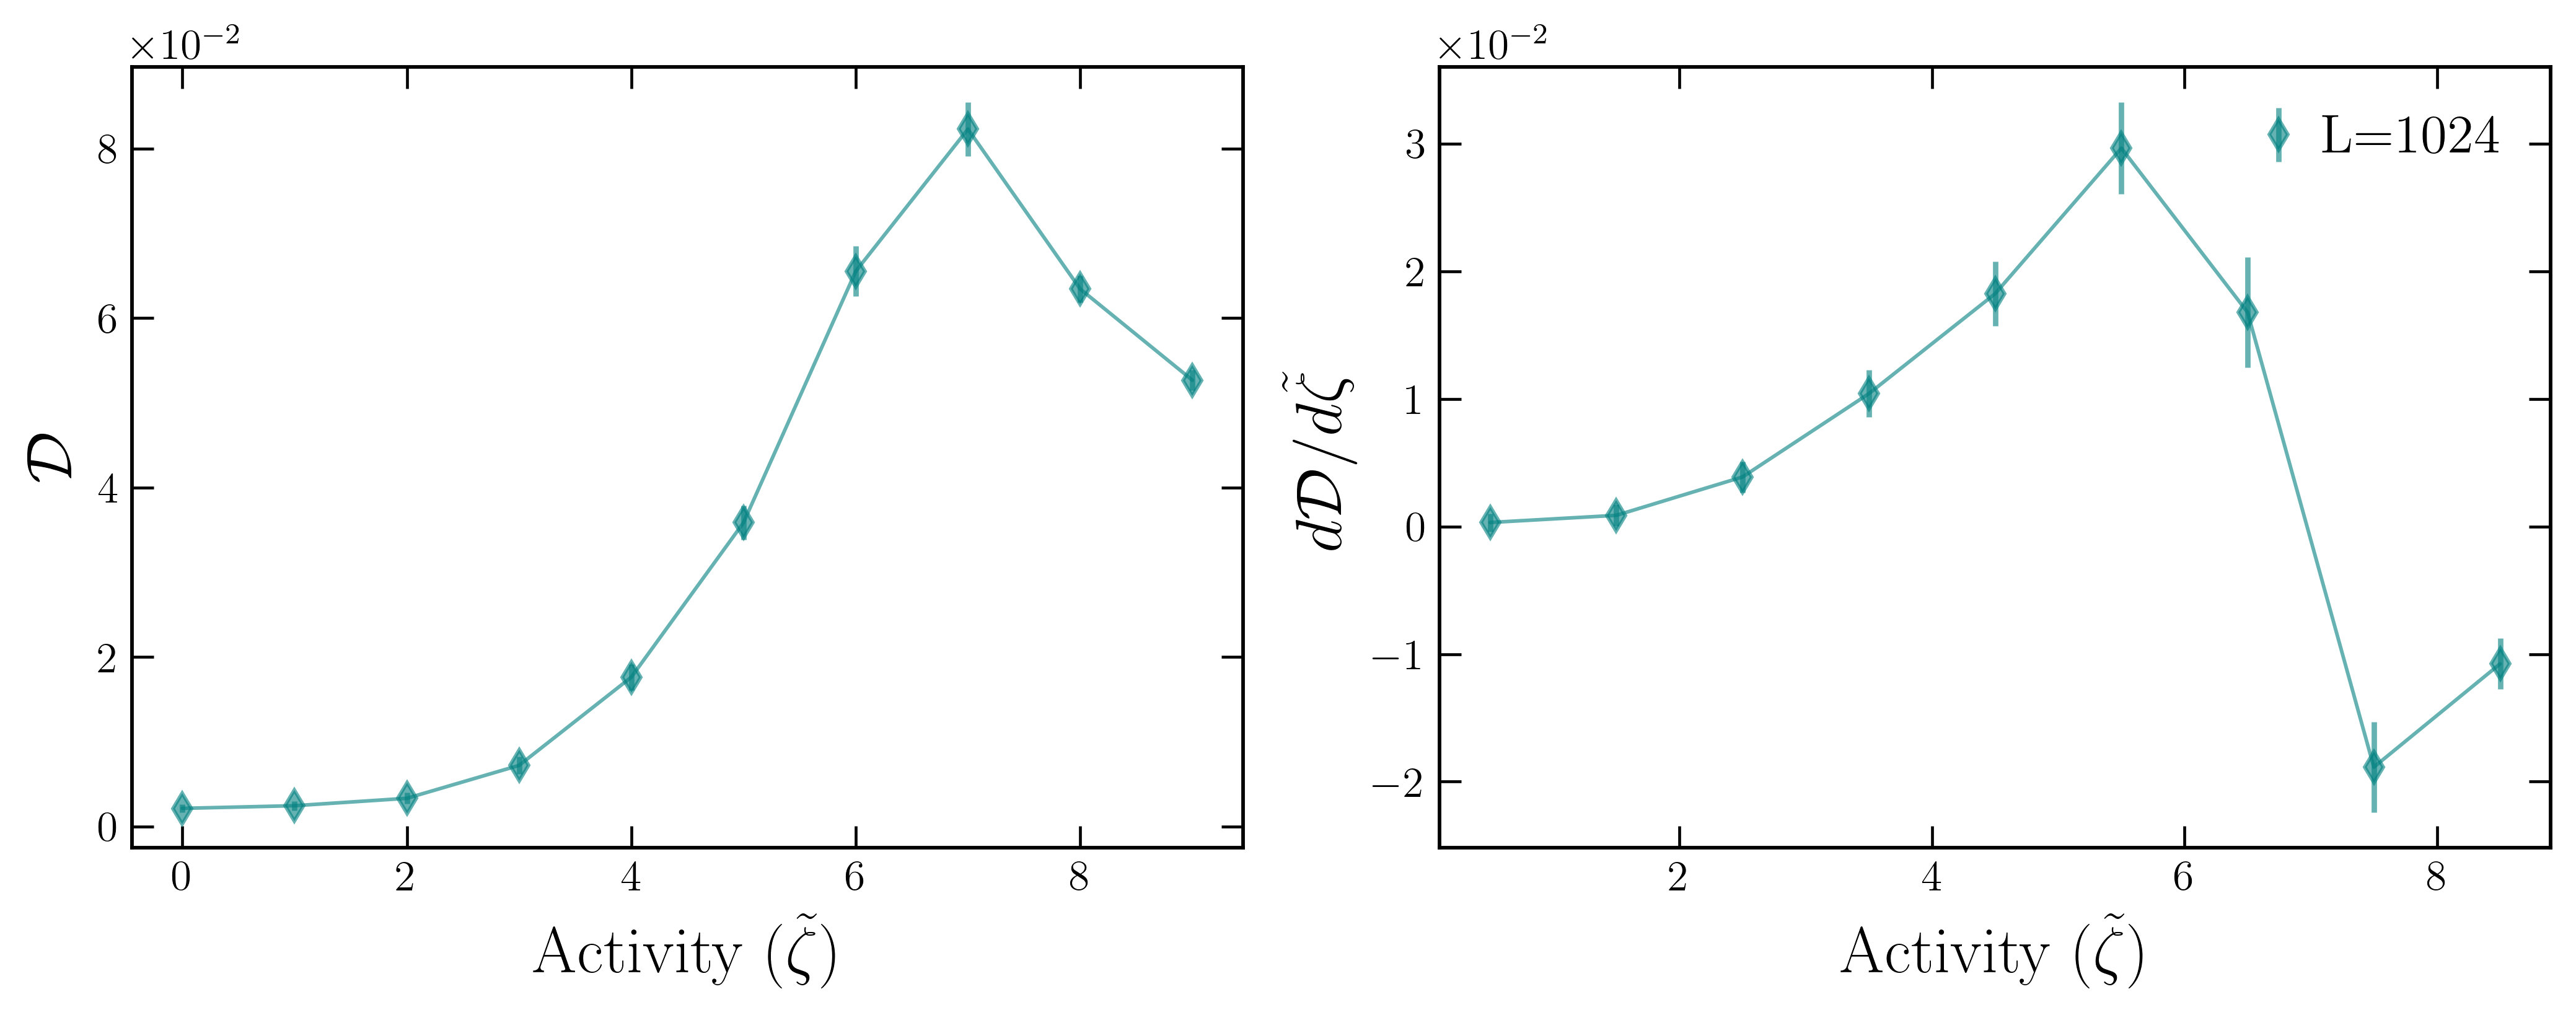

In [26]:
ac.plot_cid_and_deriv(plot_abs=True);
ac.plot_div_and_deriv();

In [12]:
dic={'':'hej'}
dic.keys()

dict_keys([''])

In [ ]:
ac.plot_cid_fluc(plot_abs=True);
ac.plot_div_fluc(plot_abs=True, plot_div_per=False);

Figure saved to: data\nematic\figs\ndg\nb6cg4\cid_moments.pdf
Figure saved to: data\nematic\figs\ndg\nb6cg4\div_moments.pdf


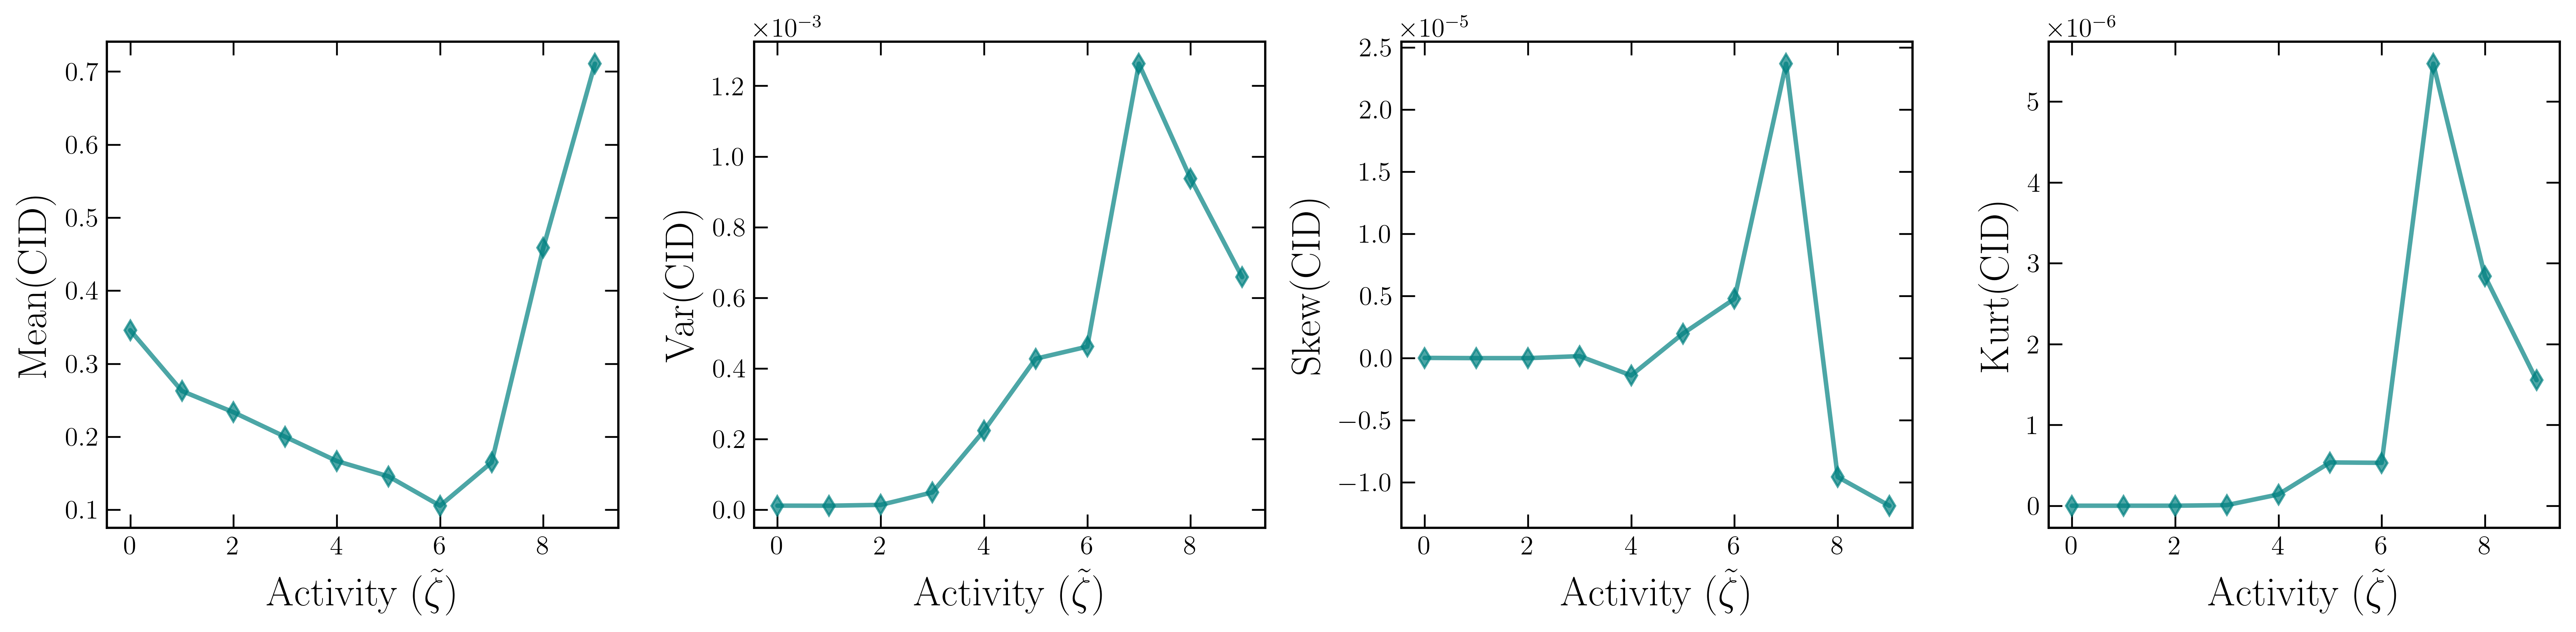

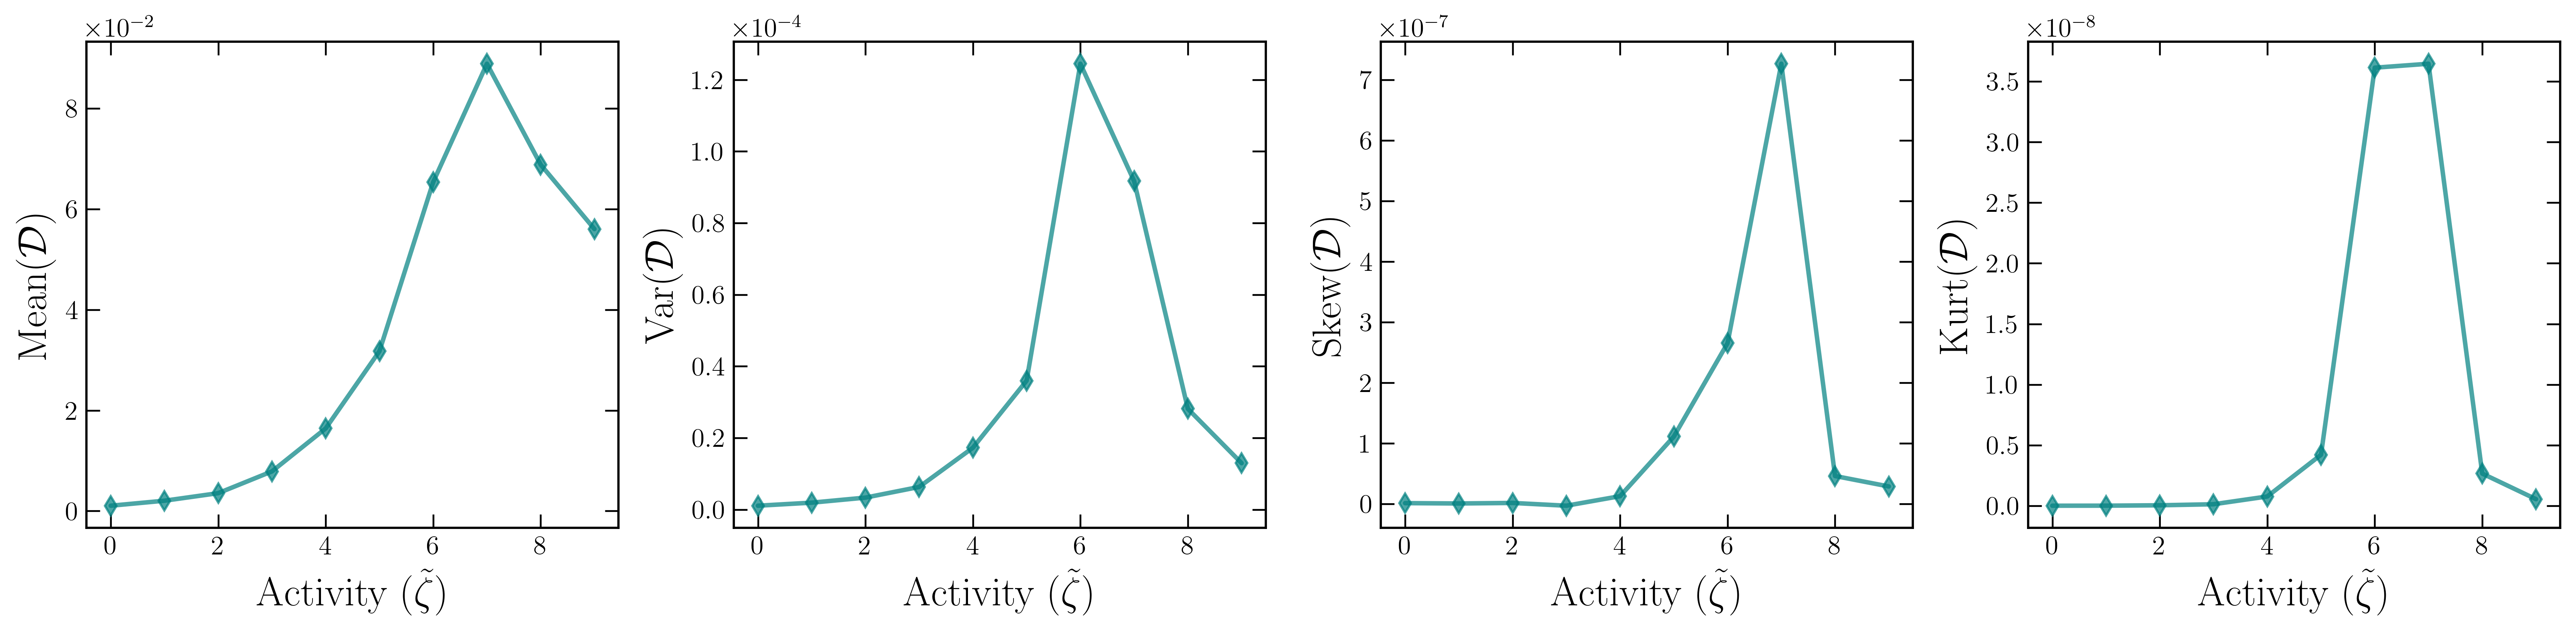

In [9]:
ac.plot_cid_moments();
ac.plot_div_moments();

In [ ]:
#### Plot cid/div and derivatives
xlims=(0.016, 0.045)
fig, ax = ac.plot_cid_and_deriv(save_path=figs_save_path, xlims=xlims, plot_abs=True,);
fig1, ax1 = ac.plot_div_and_deriv(save_path=figs_save_path, xlims=xlims, plot_abs=True,);


In [ ]:
#### Plot cid/div fluc and derivatives
xlims=(0.016, 0.045)
fig, ax = ac.plot_cid_fluc(save_path=figs_save_path,xlims=xlims, plot_abs=True,);
fig1, ax1 = ac.plot_div_fluc(save_path=figs_save_path, xlims=xlims, plot_abs=True, plot_div_per=True);

In [ ]:
## Plot cid/div moments
xlims=(0.016, 0.045)
fig, ax = ac.plot_cid_moments(L_list=ac.L_list, save_path=figs_save_path, xlims=xlims,);
fig1, ax1 = ac.plot_div_moments(L_list=ac.L_list, save_path=figs_save_path, xlims=xlims,);